In [23]:
import os
import sys
module_paths = [os.path.abspath('../src'), os.path.abspath('..')]
print(module_paths)
for module_path in module_paths:
    if module_path not in sys.path:
        sys.path.append(module_path)
import numpy as np
from skimage.io import imread
from skimage.measure import label, regionprops
from skimage.segmentation import find_boundaries

['/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code/src', '/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code']


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from data_loader.watershed_masks_reader import WatershedMasksReader
from data_loader.simple_masks_reader import SimpleMasksReader
from data import make_train_df
import config
params = config.local

In [4]:
X, y = make_train_df(params)

Find 670 train_ids


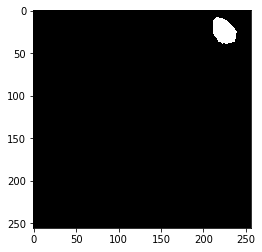

In [66]:
img = imread(y[0][0])
plt.imshow(img, cmap='gray')

In [20]:
regions = regionprops(img)

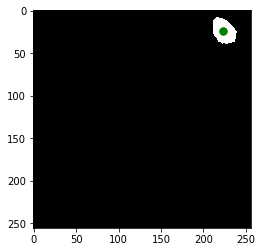

In [21]:
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
for props in regions:
    y0, x0 = props.centroid
    ax.plot(x0, y0, '.g', markersize=15)

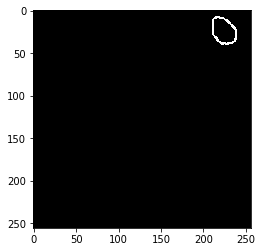

In [70]:
b=find_boundaries(img, connectivity=5)
plt.imshow(b, cmap='gray')

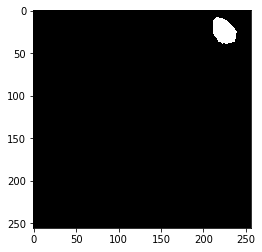

In [41]:
plt.imshow(img - b.astype('float32'), cmap='gray')

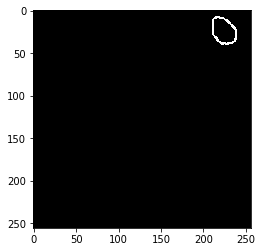

In [47]:
plt.imshow(img - (img - b.astype('float32')), cmap='gray')

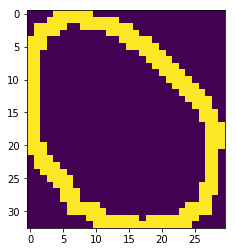

In [71]:
# i = img - b.astype('float32')
i = b
plt.imshow(b[7:40,210:240])

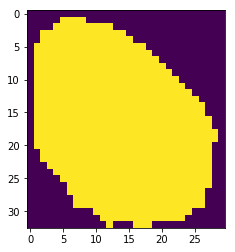

In [72]:
plt.imshow(img[7:40,210:240])

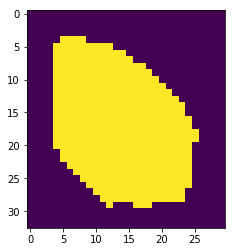

In [98]:
i = img
for _ in range(3):
    b = find_boundaries(i)
    i = np.logical_not(np.logical_not(i.astype('bool')) | b)

plt.imshow(i[7:40,210:240])